In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

In [4]:
df=pd.read_csv("d:\Master\Kuliah\Semester 7\Machine Learning\Praktikum 1\Bahan data\FuelConsumptionCo2.csv")
#melihat 5 baris pertama data
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\NISANUR\AppData\Local\Temp\ipykernel_1908\317811329.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("d:\Master\Kuliah\Semester 7\Machine Learning\Praktikum 1\Bahan data\FuelConsumptionCo2.csv")


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#kita ambil kolom mana saja yang akan kita analisis,dan membuang sisanya
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


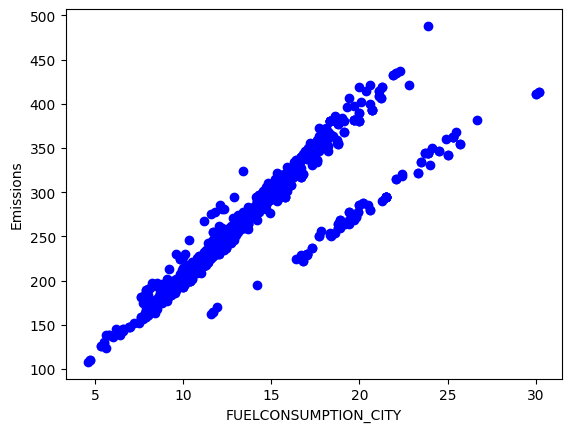

In [6]:
#plot hubungan variabel konsumsi bahan bakar dg emisi CO2
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emissions")
plt.show()

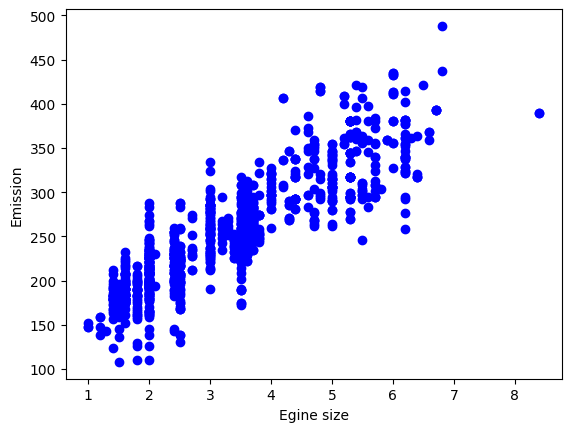

In [7]:
#plot hubungan variabel ukuran mesin dg emisi CO2
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Egine size")
plt.ylabel("Emission")
plt.show()


In [8]:
#membagi data (data splitting)
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

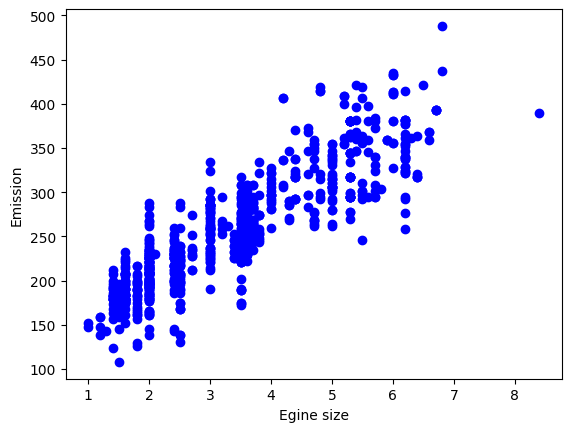

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Egine size")
plt.ylabel("Emission")
plt.show()

In [10]:
#membuat model regresi
regr=LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

#koefisien model
print("Coeficients: ",regr.coef_)
print("Intercept: ",regr.intercept_)

Coeficients:  [[39.11550293]]
Intercept:  [125.64724711]


Text(0, 0.5, 'Emission')

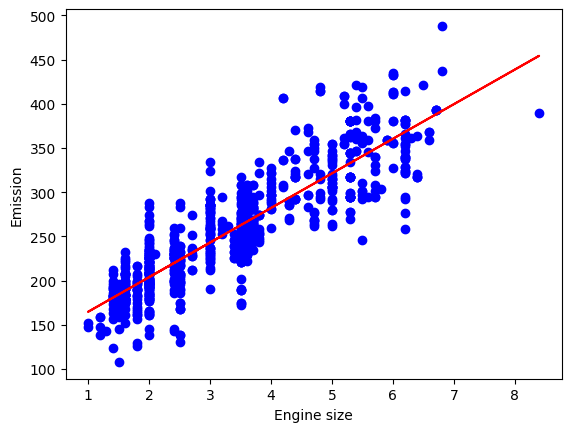

In [11]:
#plot hasil regresi
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [12]:
#menghitung error
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f"% r2_score(test_y_, test_y))

Mean absolute error: 22.22
Residual sum of squares (MSE): 848.17
Re-score: 0.69
